In [24]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 수치 데이터에만 집중
numeric_cols = ['age', 'fare']
print("타이타닉 데이터셋 기본 정보:")
print(titanic[numeric_cols].describe())
titanic

타이타닉 데이터셋 기본 정보:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 결측치(Missing Value) 처리 (이전에 배운 내용 활용)

# 성별/객실 그룹의 평균 나이로 결측치 채우기

titanic_processed = titanic.copy()
# age_mask = titanic['age'].isna()  # 이거 없어도 됐었네.
# missing = titanic.isna().sum()
# 일단 성별 & 객실 평균을 구하고
titanic.groupby(['sex', 'pclass'])['age'].mean()

# 평균은 구했는데, 알아서 맞춰주는 건...?
mean_ages = titanic.groupby(['sex', 'pclass'])['age'].transform('mean') # 결측치가 아니라 그냥 다 바뀜.
# 이런 규칙이 적용된 series를 만든 것.

# 특성에 맞는 평균값을 결측치에 넣어주는 작업.
titanic_processed['age'] = titanic['age'].fillna(mean_ages) # NaN에 mean_ages시리즈를 채워라~

# titanic_processed.loc[age_mask]
# titanic_processed.loc[titanic['age'].isna()]
titanic_processed
# titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


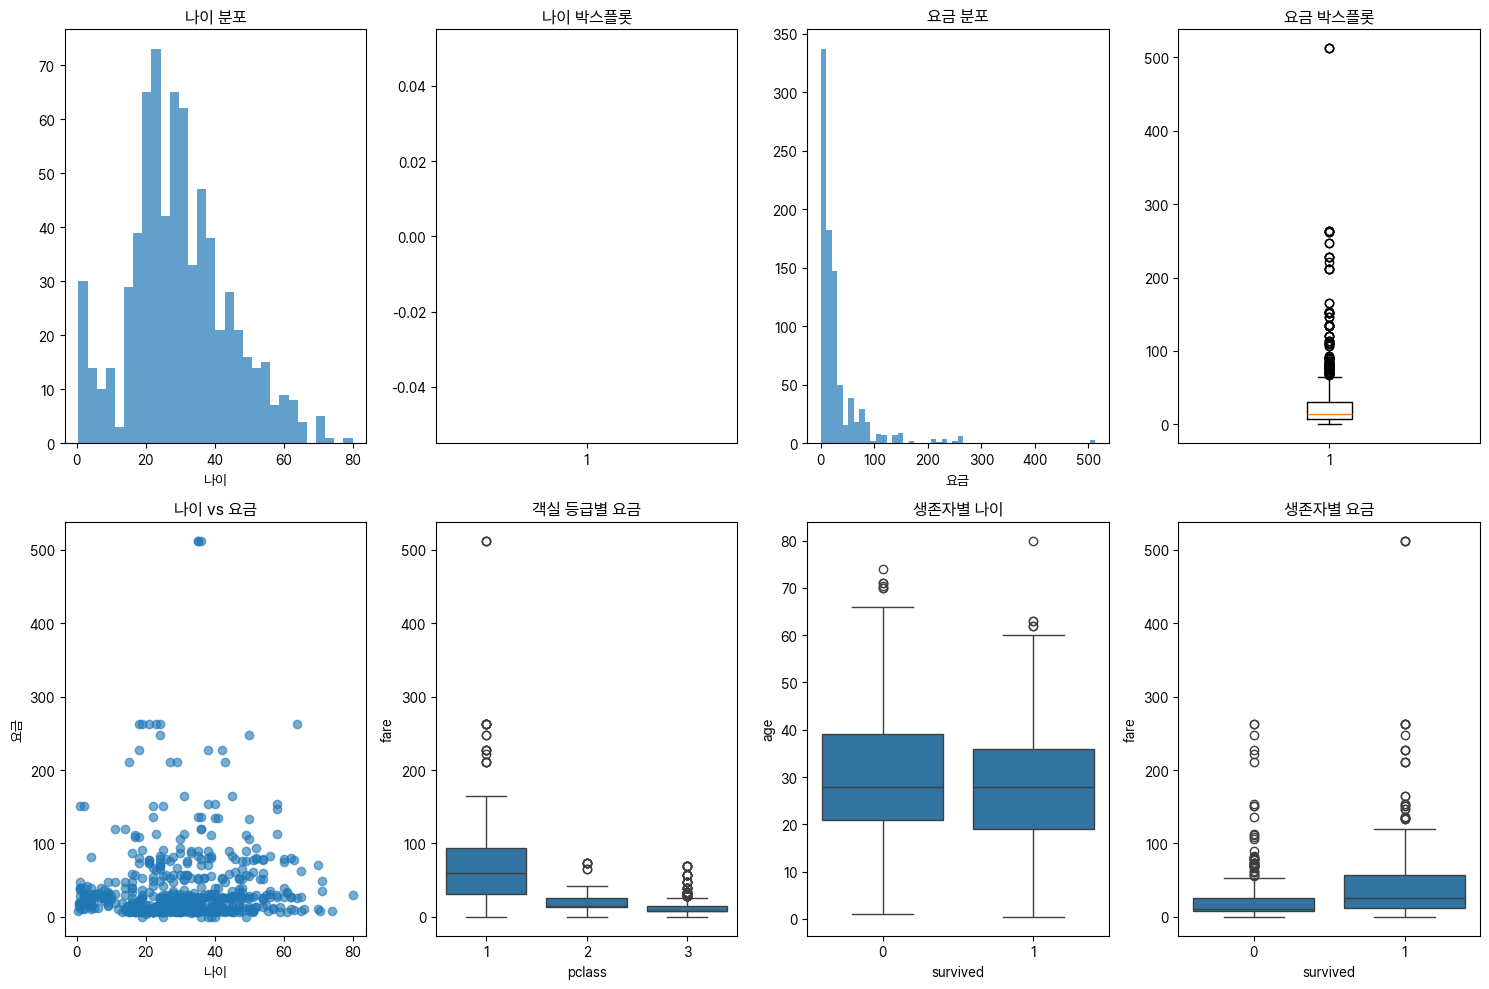

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

# 결측치 처리 안하면 제대로 시각화 제대로 안나옴

# 1. 이상치 탐지 및 시각화
plt.figure(figsize=(15, 10))

# 나이 분포
plt.subplot(2, 4, 1)
plt.hist(titanic['age'], bins=30, alpha=0.7)
plt.title('나이 분포')
plt.xlabel('나이')

plt.subplot(2, 4, 2)
plt.boxplot(titanic['age'])
plt.title('나이 박스플롯')

# 요금 분포
plt.subplot(2, 4, 3)
plt.hist(titanic['fare'], bins=50, alpha=0.7)
plt.title('요금 분포')
plt.xlabel('요금')

plt.subplot(2, 4, 4)
plt.boxplot(titanic['fare'])
plt.title('요금 박스플롯')

# 산점도
plt.subplot(2, 4, 5)
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('나이 vs 요금')

# 객실 등급별 요금 분포
plt.subplot(2, 4, 6)
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('객실 등급별 요금')

# 생존자별 나이 분포
plt.subplot(2, 4, 7)
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('생존자별 나이')

# 생존자별 요금 분포
plt.subplot(2, 4, 8)
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('생존자별 요금')

plt.tight_layout()
plt.show()

In [112]:
# 2. 요금 데이터의 이상치 분석
# IQR 방법으로 이상치 탐지
# 이상치에 해당하는 승객들 특성 분석

# def detect_outlier(data: pd.DataFrame, col: str, lower=1, upper=99):
#     lower_bound = data[col].quantile(lower / 100)
#     upper_bound = data[col].quantile(upper / 100)
#     missing = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
#     data[col]

def detect_oulier_iqr(data: pd.DataFrame, col: str):
    q1 = data[col].quantile(0.25)    # 상위 75%
    # data[col].describe()
    q3 = data[col].quantile(0.75)    # 상위 25%
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    mask = (data[col] < lower_bound) | (data[col] > upper_bound)

    return mask



"""이상치에는 first_class가 매우 많이 분포함."""

titanic_outliers = titanic_processed[detect_oulier_iqr(titanic_processed, 'fare')]
# titanic_processed[detect_oulier_iqr(titanic_processed, 'fare')].groupby(['class']).size()

titanic_outliers.groupby('class').size()

detect_oulier_iqr(titanic_processed, 'fare').agg({
    'sum', 'count'
})


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_18447/2331208072.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_outliers.groupby('class').size()


count    891
sum      116
Name: fare, dtype: int64

In [121]:
print(titanic_outliers['class'].value_counts())
print(titanic_outliers['survived'].value_counts())
print(titanic_processed['embark_town'].value_counts())
print(titanic_outliers['embark_town'].value_counts())
print(titanic_processed['embark_town'].value_counts() / titanic_outliers['embark_town'].value_counts())

class
First     104
Third       7
Second      5
Name: count, dtype: int64
survived
1    79
0    37
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
embark_town
Southampton    60
Cherbourg      52
Queenstown      2
Name: count, dtype: int64
embark_town
Southampton    10.733333
Cherbourg       3.230769
Queenstown     38.500000
Name: count, dtype: float64


In [146]:
# 3. 객실 등급을 고려한 이상치 분석
# 객실 등급별로 요금 이상치 탐지
titanic_p_f = titanic_processed[titanic_processed['pclass'] == 1]

titanic_p_f['f_outlier'] = detect_oulier_iqr(titanic_p_f, 'fare')
# titanic_p_f[titanic_p_f['f_outlier'] == True].count()    # 196...?(outlier가 20)
# titanic_p_f.count()  #216

titanic_p_s = titanic_processed[titanic_processed['pclass'] == 2]
titanic_p_s['s_outlier'] = detect_oulier_iqr(titanic_p_s, 'fare')

titanic_p_t = titanic_processed[titanic_processed['pclass'] == 3]
titanic_p_t['t_outlier'] = detect_oulier_iqr(titanic_p_t, 'fare')

titanic_p_f[titanic_p_f['f_outlier'] == True].count()
# titanic_p_s[titanic_p_s['s_outlier'] == True].count()   # 7

# titanic_p_t[titanic_p_t['t_outlier'] == True].count()   # 52

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_18447/3120132421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_p_f['f_outlier'] = detect_oulier_iqr(titanic_p_f, 'fare')
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_18447/3120132421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_p_s['s_outlier'] = detect_oulier_iqr(titanic_p_s, 'fare')
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_18447/3120132421.py:13: SettingWithCopyWarning: 
A value is tryi

survived       20
pclass         20
sex            20
age            20
sibsp          20
parch          20
fare           20
embarked       20
class          20
who            20
adult_male     20
deck           17
embark_town    20
alive          20
alone          20
f_outlier      20
dtype: int64

In [ ]:
# 그룹단위 통계에 대한 강사쌤 코드.
def detect_outliers_bygroup(data: pd.DataFrame, group_col: str, value_col: str):
    """그룹별 이상치 탐지"""
    # 전원 모두 이상치 아님으로 시작.
    # outliers = pd.Series([False] * len(data))
    outliers = pd.Series(False, data.index)
    for group in data[group_col].unique():  # unique지만 먼저 나오는 순서대로 인덱스를 뽑음.
        # df[df['pclass'] == 1]['fare']
        group_data = data[data[group_col] == group][value_col]
        q1 = group_data.quantile(0.25)
        q3 = group_data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        mask = (group_data < lower) | (group_data > upper)
        outliers[group_data.index] = mask
    return outliers

fare_outliers_byclass = detect_outliers_bygroup(titanic_processed, 'pclass', 'fare')
fare_outliers_byclass

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# 이거는 '김민정'님 만드신 함수

def detect_outlier_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    return (data_series < lower_bound) | (data_series > upper_bound)

outlier_mask = titanic.groupby('pclass')['fare'].transform(detect_outlier_iqr)
outlier_mask.count()

np.int64(891)

In [88]:
# 4. 이상치 처리 방법 적용 및 비교
# 방법 1: 제거
outliers = detect_oulier_iqr(titanic_processed, 'fare')
titanic_removed = titanic_processed[~outliers]
titanic_removed.groupby('pclass').size()

pclass
1    112
2    179
3    484
dtype: int64

In [108]:
t_p_byclass = titanic_processed.groupby('pclass').size()
t_o_byclass = titanic_outliers.groupby('pclass').size()
t_r_byclass = titanic_removed.groupby('pclass').size()
t_p_byclass
total_byclass = pd.concat([t_p_byclass, t_o_byclass, t_r_byclass], axis=1)
total_byclass.columns = ['original', 'outliers', 'removed']
total_byclass

,original,outliers,removed
pclass,,,
1,216,104,112
2,184,5,179
3,491,7,484


In [149]:
# 방법 2: 윈저화 (95% 백분위수로 제한)
def wnsrz_outlrs(data:pd.DataFrame, col, lower=5, upper=95):
    lower_bound = data[col].quantile(lower / 100)
    upper_bound = data[col].quantile(upper / 100)
    data_wnsrz = data.copy()
    data_wnsrz[col] = data_wnsrz[col].clip(lower=lower_bound, upper=upper_bound)
    return data_wnsrz

wnsrz_outlrs(titanic_processed, 'fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


> # ***`개똥멍청이`가 된 기분*** ☺️

In [ ]:
# 방법 3: 객실 등급별 중앙값으로 대체


0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: fare, Length: 891, dtype: bool

In [ ]:
# 5. 처리 결과 비교
# 6. 시각화: 처리 방법별 분포 비교
# 7. 이상치 처리가 분석에 미치는 영향 확인